<a href="https://colab.research.google.com/github/NuarDanKR/Apps/blob/main/DataAnalysis/commerce_hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Hospitals in South Korea<br>
Authour : Nuar Dan

## Objective
+ To analyze commercial information
+ Source(data.org)

# Google Colab 
+ To access google colab
+ To import google drive

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/MyDrive/DEV/DataScience/

[Errno 2] No such file or directory: 'drive/MyDrive/DEV/DataScience/'
/content/drive/MyDrive/DEV/DataScience


## Library
+ pandas :  to use dataframe
+ numpy : to compute dataset
+ seaborn :  to vizualize

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns

## Font configuration
+ matplot :  to vizualize and set the font
+ IPython.display : to configure display

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic') # 맑은 고딕을 폰트로
plt.rc('axes',unicode_minus=False) # 폰트 깨짐 방지

# 그래프를 노트북 안으로 불러오기
%matplotlib inline 

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') #레티나 디스플레이로 설정

## Loading Data
+ use read_csv() to load data in pandas
+ put data in 'df'
+ use shape to count the length of data

In [ ]:
df=pd.read_csv('data/commerce_hospital.csv',low_memory=False)

In [ ]:
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,일반 의원,41.0,경기도,41273.0,안산시 단원구,4127360000,선부3동,4.127311e+09,선부동,4127310900210810000,1,대지,1081,NaN,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,NaN,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,일반 의원,11.0,서울특별시,11680.0,강남구,1168065600,도곡2동,1.168012e+09,도곡동,1168011800204670014,1,대지,467,14.0,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,NaN,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,일반 의원,41.0,경기도,41390.0,시흥시,4139059100,정왕1동,4.139013e+09,정왕동,4139013200217400001,1,대지,1740,1.0,경기도 시흥시 정왕동 1740-1,413903199049,경기도 시흥시 중심상가로,178,NaN,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,NaN,26.0,부산광역시,26500.0,수영구,2650078000,광안3동,2.650010e+09,광안동,2650010400200740001,1,대지,74,1.0,부산광역시 수영구 광안동 74-1,265003131037,부산광역시 수영구 수영로,688,NaN,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,의약품 및 의료용품 소매업,41.0,경기도,41465.0,용인시 수지구,4146551000,풍덕천1동,4.146510e+09,풍덕천동,4146510100207120002,1,대지,712,2.0,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,NaN,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,의약품 및 의료용품 소매업,30.0,대전광역시,30170.0,서구,3017063000,둔산1동,3.017011e+09,둔산동,3017011200215070000,1,대지,1507,NaN,대전광역시 서구 둔산동 1507,301703166026,대전광역시 서구 문예로,67,NaN,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,개인 간병인 및 유사 서비스업,41.0,경기도,41281.0,고양시 덕양구,4128162200,화정2동,4.128112e+09,화정동,4128112300211460000,1,대지,1146,NaN,경기도 고양시 덕양구 화정동 1146,412813192038,경기도 고양시 덕양구 성신로,14,NaN,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,일반 병원,26.0,부산광역시,26410.0,금정구,2641061000,장전2동,2.641011e+09,장전동,2641010800205380001,1,대지,538,1.0,부산광역시 금정구 장전동 538-1,264103130022,부산광역시 금정구 금강로,209,NaN,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,한의원,11.0,서울특별시,11740.0,강동구,1174068500,길동,1.174010e+09,길동,1174010500203450009,1,대지,345,9.0,서울특별시 강동구 길동 345-9,117403124009,서울특별시 강동구 천중로,213,NaN,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993


In [ ]:
df.shape #결과는  (행,열) 순으로 나옴

(91335, 39)

## Preview data
+ use head() and tail()

In [ ]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,일반 의원,41.0,경기도,41273.0,안산시 단원구,4127360000,선부3동,4.127311e+09,선부동,4127310900210810000,1,대지,1081,NaN,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,NaN,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,일반 의원,11.0,서울특별시,11680.0,강남구,1168065600,도곡2동,1.168012e+09,도곡동,1168011800204670014,1,대지,467,14.0,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,NaN,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,일반 의원,41.0,경기도,41390.0,시흥시,4139059100,정왕1동,4.139013e+09,정왕동,4139013200217400001,1,대지,1740,1.0,경기도 시흥시 정왕동 1740-1,413903199049,경기도 시흥시 중심상가로,178,NaN,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,NaN,26.0,부산광역시,26500.0,수영구,2650078000,광안3동,2.650010e+09,광안동,2650010400200740001,1,대지,74,1.0,부산광역시 수영구 광안동 74-1,265003131037,부산광역시 수영구 수영로,688,NaN,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,의약품 및 의료용품 소매업,41.0,경기도,41465.0,용인시 수지구,4146551000,풍덕천1동,4.146510e+09,풍덕천동,4146510100207120002,1,대지,712,2.0,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,NaN,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [ ]:
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,의약품 및 의료용품 소매업,30.0,대전광역시,30170.0,서구,3017063000,둔산1동,3.017011e+09,둔산동,3017011200215070000,1,대지,1507,NaN,대전광역시 서구 둔산동 1507,301703166026,대전광역시 서구 문예로,67,NaN,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,개인 간병인 및 유사 서비스업,41.0,경기도,41281.0,고양시 덕양구,4128162200,화정2동,4.128112e+09,화정동,4128112300211460000,1,대지,1146,NaN,경기도 고양시 덕양구 화정동 1146,412813192038,경기도 고양시 덕양구 성신로,14,NaN,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,일반 병원,26.0,부산광역시,26410.0,금정구,2641061000,장전2동,2.641011e+09,장전동,2641010800205380001,1,대지,538,1.0,부산광역시 금정구 장전동 538-1,264103130022,부산광역시 금정구 금강로,209,NaN,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,한의원,11.0,서울특별시,11740.0,강동구,1174068500,길동,1.174010e+09,길동,1174010500203450009,1,대지,345,9.0,서울특별시 강동구 길동 345-9,117403124009,서울특별시 강동구 천중로,213,NaN,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,일반 의원,44.0,충청남도,44131.0,천안시 동남구,4413153000,원성1동,4.413111e+09,원성동,4413110700202660017,1,대지,266,17.0,충청남도 천안시 동남구 원성동 266-17,441313249040,충청남도 천안시 동남구 중앙로,92,NaN,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [ ]:
df.tail(1) #끝에서 하나만 미리보기

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,일반 의원,44.0,충청남도,44131.0,천안시 동남구,4413153000,원성1동,4.413111e+09,원성동,4413110700202660017,1,대지,266,17.0,충청남도 천안시 동남구 원성동 266-17,441313249040,충청남도 천안시 동남구 중앙로,92,NaN,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


## Summurizing data

### Summerized data

In [ ]:
#info를 이용하면 column에 대한 요약이 됨
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### Finding out names in columns

In [ ]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### Finding out data type

In [ ]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

### Null data

In [ ]:
df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,True,False,False


In [ ]:
null_count=df.isnull().sum()  #python 에서 True==1 이므로 1의 합이 완성됨
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

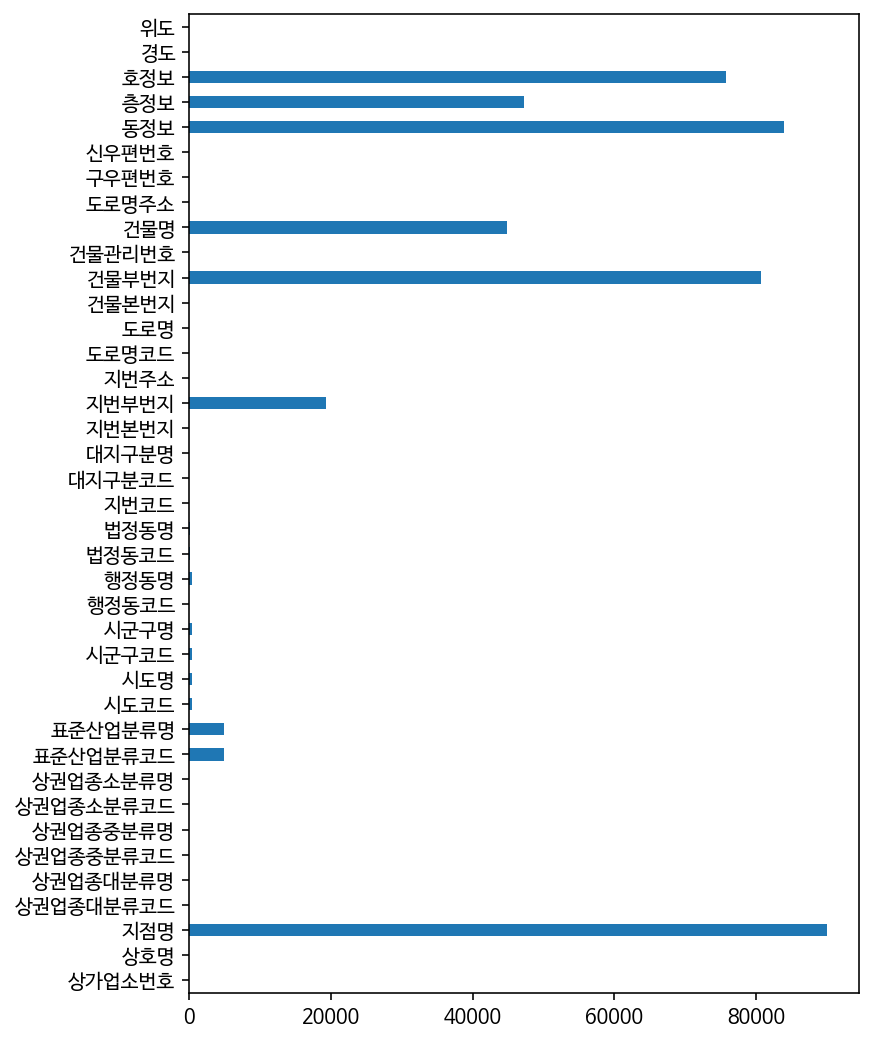

In [ ]:
null_count.plot.barh(figsize=(6,9))

In [ ]:
# null count의 index 초기화하기
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## Change the Name of the Column

In [ ]:
# column 이름 찾기
df_null_count.columns

Index(['index', 0], dtype='object')

In [ ]:
#[index,0]을 아래와 같이 바꾸기
df_null_count.columns=['열','결측치']
df_null_count

,열,결측치
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


## Sorting

In [ ]:
#결측치 역순으로 정렬 뒤 상위 10개만 출력

null_top=df_null_count.sort_values(by='결측치',ascending=False).head(10)
null_top

,열,결측치
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


## Specific column

In [ ]:
# 지점 이름이 없는 데이터가 많음을 알 수 있음
df['지점명'].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: 지점명, dtype: object

In [ ]:
#결측치가 많은 상위 10개 항목을 리스트로 변환
dropped = null_top['열'].tolist()
dropped

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [ ]:
# df는 전체 데이터 인데, []안에 리스트로된 dropped 만 들어가져서 결측치가 많은 데이터들이 소팅됨


df[dropped].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## Elaminating nulls

In [ ]:
#1이 세워져 있다고 기억하면 편함
print(df.shape)
df= df.drop(dropped,axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## Basic static information

### Mean, median, max, min

In [ ]:
#평균값
df['위도'].mean()

36.62471119236673

In [ ]:
df['위도'].median()

37.23465231770329

In [ ]:
df['위도'].max()

38.499658570559795

In [ ]:
df['위도'].min()

33.2192896688307

In [ ]:
df['위도'].count()

91335

### Describe()

In [ ]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [ ]:
df[['위도','경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [ ]:
df.describe(include='object')

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### Unique
+ To find out redundant values

In [ ]:
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [ ]:
df['상권업종대분류명'].nunique()

1

In [ ]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [ ]:
df['상권업종중분류명'].nunique()

5

In [ ]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [ ]:
df['상권업종소분류명'].nunique()

34

### Grouped value

In [ ]:
city=df['시도명'].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [ ]:
city_norm=df['시도명'].value_counts(normalize=True)
city_norm

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

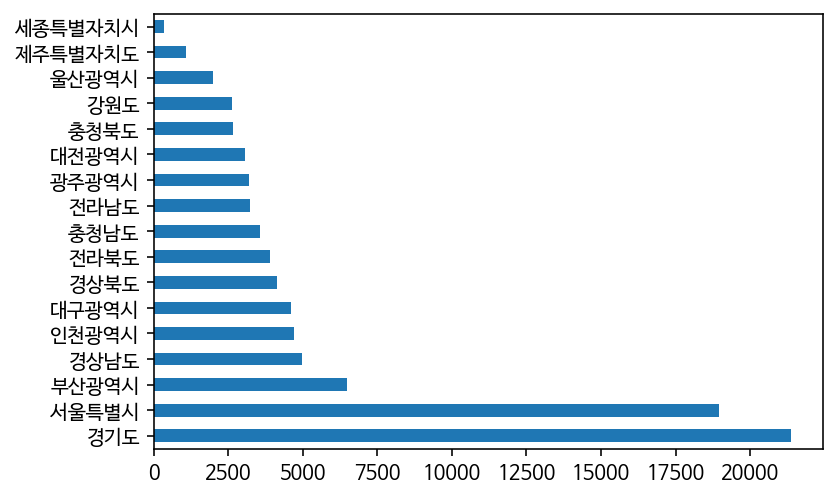

In [ ]:
city.plot.barh()

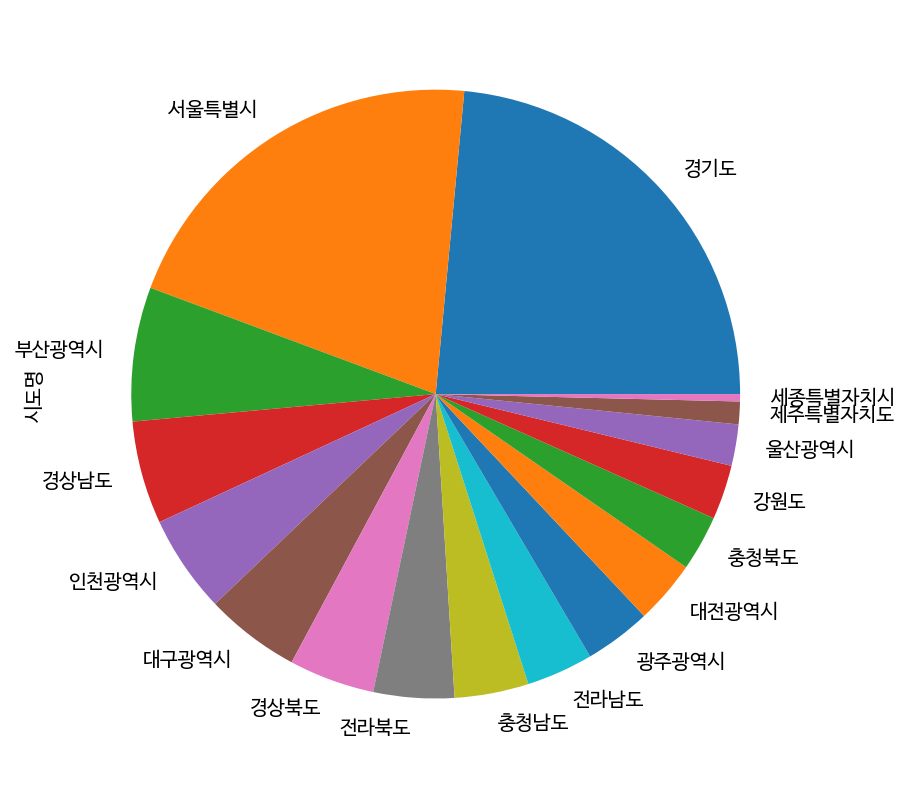

In [ ]:
city_norm.plot.pie(figsize=(7,7))

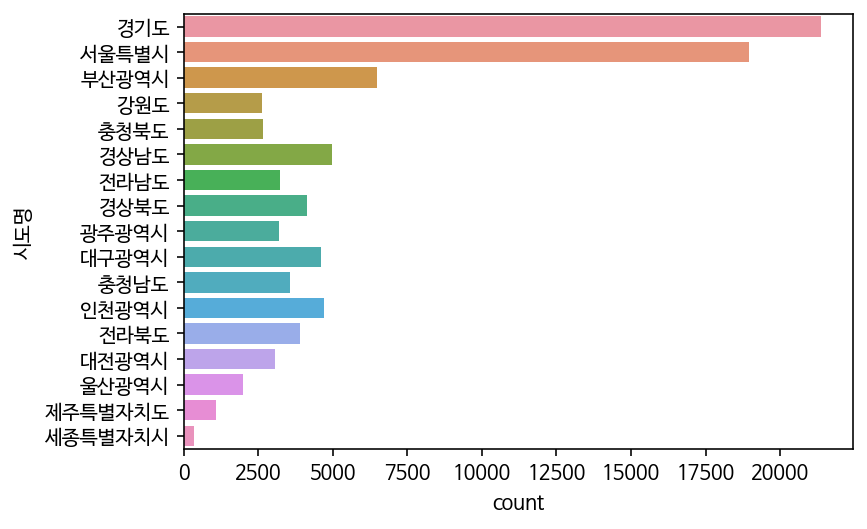

In [ ]:
sns.countplot(data=df,y='시도명')

In [ ]:
df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [ ]:
c=df['상권업종중분류명'].value_counts()

In [ ]:
n=df['상권업종중분류명'].value_counts(normalize=True)

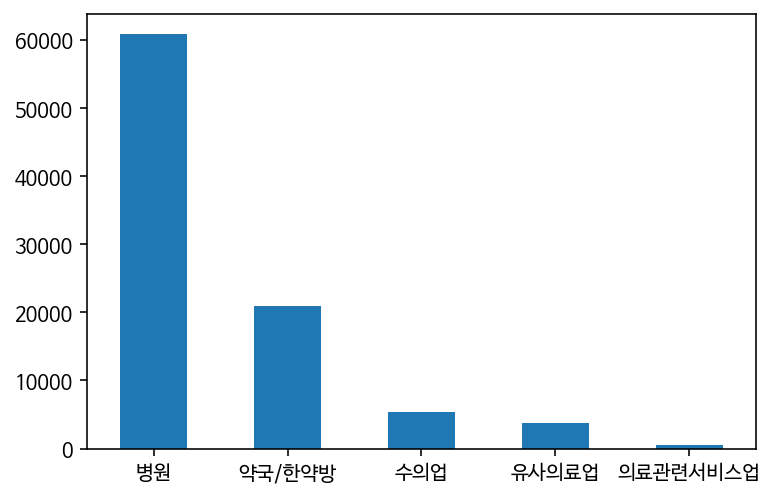

In [ ]:
c.plot.bar(rot=0)

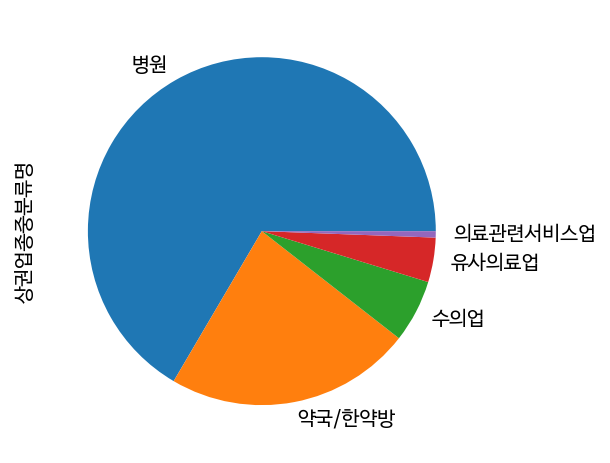

In [ ]:
c.plot.pie()

In [ ]:
c=df['상권업종소분류명'].value_counts()

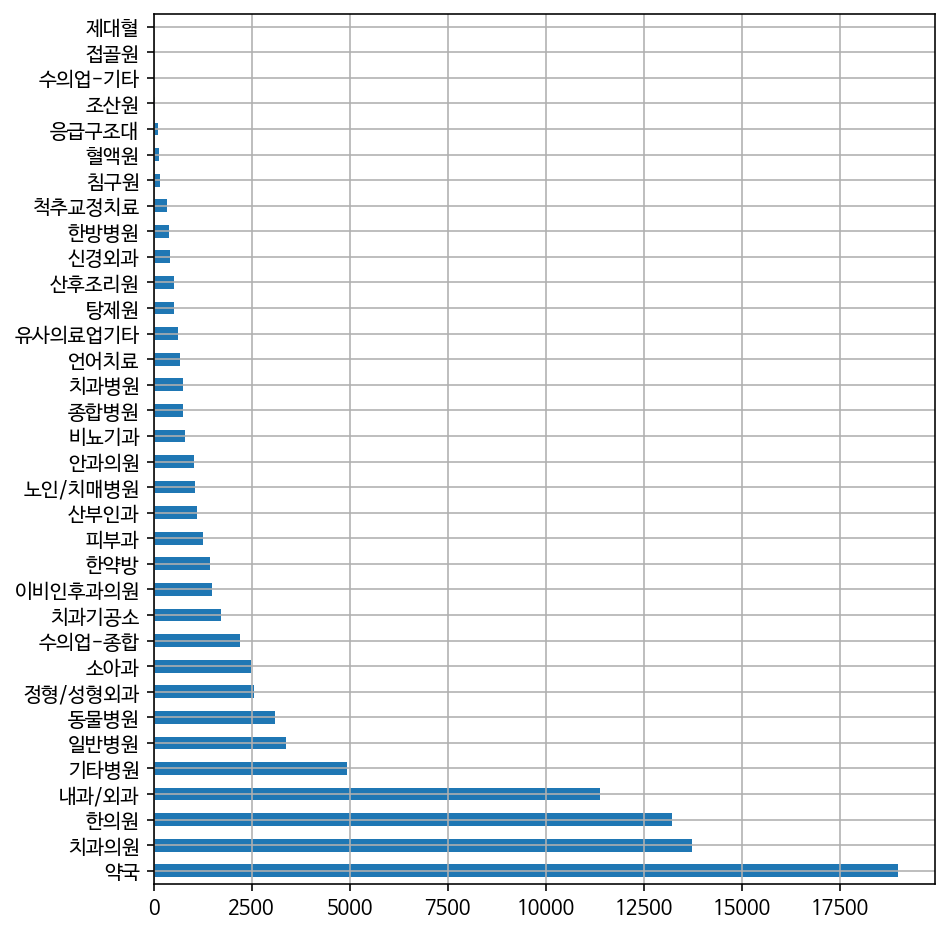

In [ ]:
c.plot.barh(figsize=(7,8),grid=True)

## Data Indexing
+ extracting sepecific data

In [ ]:
df_medical=df[df['상권업종중분류명']=='약국/한약방'].copy()
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,용인시 수지구,4146551000,풍덕천1동,4.146510e+09,풍덕천동,4146510100207120002,1,대지,712,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,강원도,42110.0,춘천시,4211054500,약사명동,4.211010e+09,중앙로2가,4211010500200990000,1,대지,99,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,충청북도,43111.0,청주시 상당구,4311168000,금천동,4.311112e+09,금천동,4311112000201870017,1,대지,187,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,경상남도,48890.0,합천군,4889046000,용주면,4.889046e+09,용주면,4889046030200780002,2,산,78,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,전라남도,46830.0,영암군,4683035000,도포면,4.683035e+09,도포면,4683035023202960000,1,대지,296,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [ ]:
m=df['상권업종대분류명']=='의료'
df.loc[m,'상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [ ]:
df_medi=df[df['상권업종중분류명']=='유사의료업']
df_medi

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
22,21013731,세종언어치료센터,S,의료,S03,유사의료업,S03B07,언어치료,부산광역시,26410.0,금정구,2641068000,구서1동,2.641011e+09,구서동,2641010700200840001,1,대지,84,부산광역시 금정구 구서동 84-1,264102000010,부산광역시 금정구 중앙대로,1817,2641010700100840001017686,부산광역시 금정구 중앙대로 1817-11,609310.0,46273.0,129.091662,35.246528
40,20933900,고려수지침학회,S,의료,S03,유사의료업,S03B03,침구원,경상남도,48123.0,창원시 성산구,4812353000,상남동,4.812313e+09,상남동,4812312700200050002,1,대지,5,경상남도 창원시 성산구 상남동 5-2,481234784088,경상남도 창원시 성산구 마디미로4번길,9,4812312700100050002026799,경상남도 창원시 성산구 마디미로4번길 9,642832.0,51495.0,128.684678,35.224113
97,21717820,청명원,S,의료,S03,유사의료업,S03B09,유사의료업기타,충청북도,43760.0,괴산군,4376037000,청안면,4.376037e+09,청안면,4376037022202410000,1,대지,241,충청북도 괴산군 청안면 금신리 241,437604538132,충청북도 괴산군 청안면 금신로1길,93,4376037022102410000007293,충청북도 괴산군 청안면 금신로1길 93,367831.0,28050.0,127.635740,36.768935
102,21865854,응급환자이송센터,S,의료,S03,유사의료업,S03B01,응급구조대,대전광역시,30140.0,중구,3014063000,대사동,3.014011e+09,대사동,3014011000202480237,1,대지,248,대전광역시 중구 대사동 248-237,301404295026,대전광역시 중구 계룡로921번길,40,3014011000102480237013097,대전광역시 중구 계룡로921번길 40,301846.0,34946.0,127.417693,36.321801
108,21914637,태화아동발달지원센터,S,의료,S03,유사의료업,S03B07,언어치료,대전광역시,30140.0,중구,3014072000,문화1동,3.014012e+09,문화동,3014011600200270000,1,대지,27,대전광역시 중구 문화동 27,301404295402,대전광역시 중구 보문산로333번길,29,3014011600100270000008172,대전광역시 중구 보문산로333번길 29,301130.0,35020.0,127.412725,36.312953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91300,16131218,으뜸치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,경상남도,48170.0,진주시,4817056500,중앙동,4.817012e+09,수정동,4817011600200390011,1,대지,39,경상남도 진주시 수정동 39-11,481704797625,경상남도 진주시 향교로18번길,8,4817011600100390011004490,경상남도 진주시 향교로18번길 8,660180.0,52753.0,128.084600,35.197029
91310,16199325,보령치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,서울특별시,11290.0,성북구,1129052500,성북동,1.129011e+09,동소문동4가,1129010700201030011,1,대지,103,서울특별시 성북구 동소문동4가 103-11,112903107003,서울특별시 성북구 동소문로,47,1129010700101030014050661,서울특별시 성북구 동소문로 47-15,136821.0,2832.0,127.010602,37.591455
91311,16199088,점프셈교실,S,의료,S03,유사의료업,S03B09,유사의료업기타,경상북도,47130.0,경주시,4713062100,황성동,4.713012e+09,황성동,4713012400204460000,1,대지,446,경상북도 경주시 황성동 446,471304715895,경상북도 경주시 용담로104번길,16,4713012400104460000024894,경상북도 경주시 용담로104번길 16,780954.0,38084.0,129.211755,35.865600
91319,16108560,씨앤디자인치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,서울특별시,11545.0,금천구,1154551000,가산동,1.154510e+09,가산동,1154510100200600025,1,대지,60,서울특별시 금천구 가산동 60-25,115453116013,서울특별시 금천구 벚꽃로,234,1154510100100600025000001,서울특별시 금천구 벚꽃로 234,153798.0,8513.0,126.886122,37.475986


In [ ]:
df['상호명'].value_counts().head(15)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
하나약국      72
서울약국      71
열린약국      68
미소약국      68
행복한약국     66
Name: 상호명, dtype: int64

In [ ]:
df_medi['상호명'].value_counts().head(15)

리원           32
고려수지침        22
대한적십자사       17
헌혈의집         12
수치과기공소       10
고려수지침학회      10
제일치과기공소       9
어울림치과기공소      8
미소치과기공소       8
스마일치과기공소      8
이사랑치과기공소      8
아트치과기공소       8
대한응급환자이송단     8
상아치과기공소       7
척추교정원         7
Name: 상호명, dtype: int64

### Several coditions

In [ ]:
seoul_drug=df[(df['상권업종소분류명']=='약국')& (df['시도명']=='서울특별시')]
print(seoul_drug.shape)
seoul_drug.head()


(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100208210000,1,대지,821,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11740.0,강동구,1174070000,둔촌2동,1.174011e+09,둔촌동,1174010600206300000,1,대지,630,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,중랑구,1126069000,신내2동,1.126011e+09,신내동,1126010600206460000,1,대지,646,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11200.0,성동구,1120057000,행당2동,1.120011e+09,행당동,1120010700203460000,1,대지,346,서울특별시 성동구 행당동 346,112003103006,서울특별시 성동구 행당로,82,1120010700103460012016935,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11230.0,동대문구,1123073000,휘경2동,1.123011e+09,휘경동,1123010900202860121,1,대지,286,서울특별시 동대문구 휘경동 286-121,112304115120,서울특별시 동대문구 망우로18나길,3,1123010900102860121007257,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349


### By District

In [ ]:
c=seoul_drug['시군구명'].value_counts()
c.head(10)

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
Name: 시군구명, dtype: int64

In [ ]:
n=seoul_drug['시군구명'].value_counts(normalize=True)

In [ ]:
seoul_hosp=df[(df['상권업종소분류명']=='종합병원')&
              (df['시도명']=='서울특별시')].copy()


In [ ]:
seoul_hosp

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,광진구,1121577000,중곡4동,1.121510e+09,중곡동,1121510100200580025,1,대지,58,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048
353,20471487,홍익병원별관,S,의료,S01,병원,S01B01,종합병원,서울특별시,11470.0,양천구,1147065000,신정4동,1.147010e+09,신정동,1147010100208970013,1,대지,897,서울특별시 양천구 신정동 897-13,114702005008,서울특별시 양천구 국회대로,250,1147010100108970013001044,서울특별시 양천구 국회대로 250,158070.0,7937.0,126.862805,37.529213
385,20737057,SNUH,S,의료,S01,병원,S01B01,종합병원,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100207360055,1,대지,736,서울특별시 강남구 역삼동 736-55,116804166727,서울특별시 강남구 테헤란로26길,10,1168010100107360055027688,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156054000,여의동,1.156011e+09,여의도동,1156011000200620000,1,대지,62,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296
2461,20024045,한양,S,의료,S01,병원,S01B01,종합병원,서울특별시,11200.0,성동구,1120055000,사근동,1.120011e+09,행당동,1120010700200150001,1,대지,15,서울특별시 성동구 행당동 15-1,112003103002,서울특별시 성동구 마조로,22,1120010700100150001019623,서울특별시 성동구 마조로 22-2,133070.0,4763.0,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205050000,1,대지,505,서울특별시 서초구 반포동 505,116502121003,서울특별시 서초구 반포대로,222,1165010700101230000017226,서울특별시 서초구 반포대로 222,137701.0,6591.0,127.005841,37.502382
76508,12292992,라마르의원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11740.0,강동구,1174062000,천호3동,1.174011e+09,천호동,1174010900204530008,1,대지,453,서울특별시 강동구 천호동 453-8,117404172367,서울특별시 강동구 천호대로157길,18,1174010900104530021010314,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11140.0,중구,1114055000,명동,1.114013e+09,명동2가,1114012700200010001,1,대지,1,서울특별시 중구 명동2가 1-1,111404103165,서울특별시 중구 명동길,74,1114012700100010001019574,서울특별시 중구 명동길 74,100809.0,4537.0,126.986758,37.563662
90581,16332576,씨엠병원,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,영등포구,1156053500,영등포동,1.156010e+09,영등포동4가,1156010500200900000,1,대지,90,서울특별시 영등포구 영등포동4가 90,115604154717,서울특별시 영등포구 영등포로36길,13,1156010500100900000035097,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,126.903857,37.518807


In [ ]:
seoul_hosp['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
송파구      5
중구       5
양천구      4
서대문구     4
강북구      4
도봉구      4
성북구      3
성동구      2
금천구      2
구로구      2
중랑구      2
강서구      2
동대문구     2
종로구      2
노원구      2
관악구      2
동작구      1
은평구      1
용산구      1
마포구      1
Name: 시군구명, dtype: int64

### Text data

In [ ]:
seoul_hosp.loc[~seoul_hosp['상호명'].str.contains('종합병원'),'상호명'].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [ ]:
seoul_hosp[seoul_hosp['상호명'].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205510000,1,대지,551,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,서초구,1165058100,반포4동,1.165011e+09,반포동,1165010700205470006,1,대지,547,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [ ]:
# 해당 명칭이 들어간 인덱스를 제외하기
drop_row=seoul_hosp[seoul_hosp["상호명"].str.contains(
    "의료기|의료기|장례|상담|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [ ]:
drop_row2=seoul_hosp[seoul_hosp["상호명"].str.endswith("의원")].index
drop_row2=drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [ ]:
to_drop=drop_row+drop_row2
to_drop

[1917,
 2803,
 4431,
 4644,
 7938,
 10283,
 47008,
 60645,
 70177,
 8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [ ]:
# drop 하기
print(seoul_hosp.shape) #드랍 이전 모양
seoul_hosp=seoul_hosp.drop(to_drop,axis=0) #드랍
print(seoul_hosp.shape) #드랍 이후


(91, 29)
(58, 29)


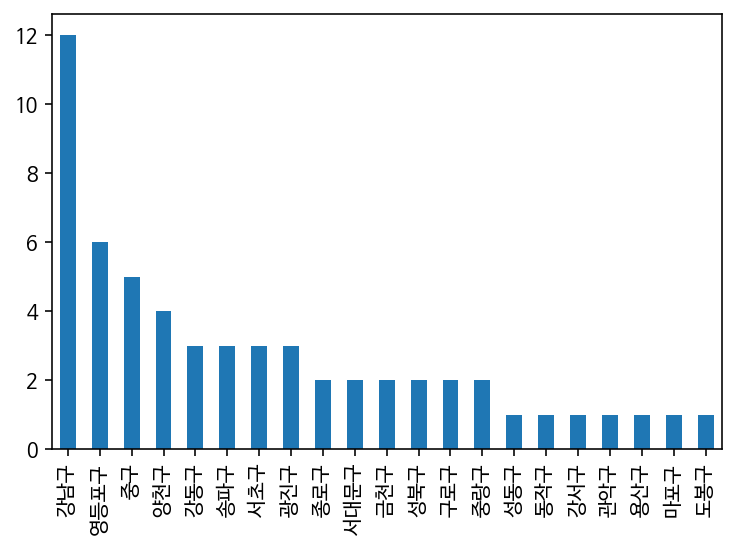

In [ ]:
seoul_hosp['시군구명'].value_counts().plot.bar()

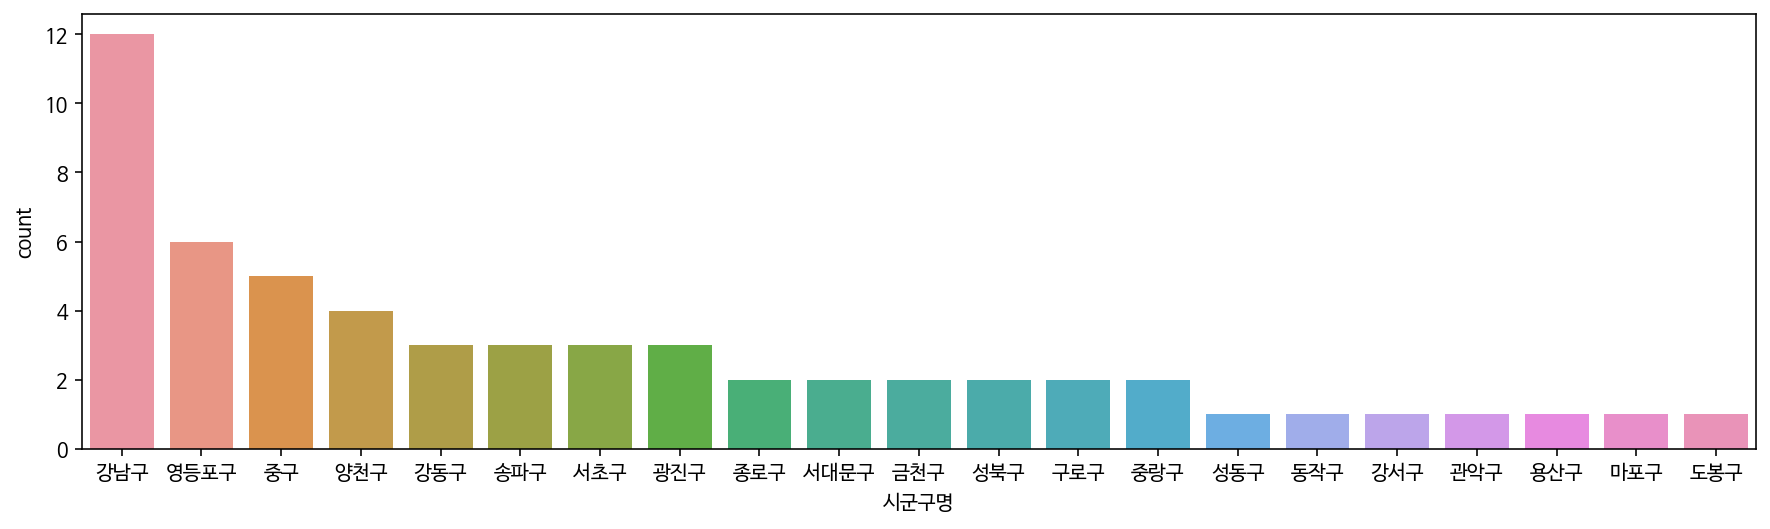

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=seoul_hosp,x='시군구명',
             order=seoul_hosp['시군구명'].value_counts().index)

In [ ]:
seoul=df[df["시도명"]=="서울특별시"].copy()
seoul.shape

(18943, 29)

In [ ]:
seoul

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,서울특별시,11680.0,강남구,1168065600,도곡2동,1.168012e+09,도곡동,1168011800204670014,1,대지,467,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,서울특별시,11680.0,강남구,1168054500,압구정동,1.168011e+09,신사동,1168010700205920004,1,대지,592,서울특별시 강남구 신사동 592-4,116803121022,서울특별시 강남구 논현로,826,1168010700105920004010990,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
9,20755460,헬로스마일소아과,S,의료,S01,병원,S01B11,소아과,서울특별시,11680.0,강남구,1168052100,논현1동,1.168011e+09,논현동,1168010800200390018,1,대지,39,서울특별시 강남구 논현동 39-18,116804166129,서울특별시 강남구 논현로131길,30,1168010800100390018000001,서울특별시 강남구 논현로131길 30,135010.0,6045.0,127.027878,37.514144
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,서울특별시,11740.0,강동구,1174065000,성내2동,1.174011e+09,성내동,1174010800200090005,1,대지,9,서울특별시 강동구 성내동 9-5,117402000008,서울특별시 강동구 천호대로,1032,1174010800100090005004868,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,강남구,1168064000,역삼1동,1.168010e+09,역삼동,1168010100208210000,1,대지,821,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91318,16190911,동민피부과비뇨기과,S,의료,S01,병원,S01B12,비뇨기과,서울특별시,11230.0,동대문구,1123070500,청량리동,1.123011e+09,청량리동,1123010700202350001,1,대지,235,서울특별시 동대문구 청량리동 235-1,112303105006,서울특별시 동대문구 약령시로,147,1123010700102350001013495,서울특별시 동대문구 약령시로 147,130781.0,2489.0,127.045802,37.583788
91319,16108560,씨앤디자인치과기공소,S,의료,S03,유사의료업,S03B06,치과기공소,서울특별시,11545.0,금천구,1154551000,가산동,1.154510e+09,가산동,1154510100200600025,1,대지,60,서울특별시 금천구 가산동 60-25,115453116013,서울특별시 금천구 벚꽃로,234,1154510100100600025000001,서울특별시 금천구 벚꽃로 234,153798.0,8513.0,126.886122,37.475986
91320,16131813,월계치과,S,의료,S01,병원,S01B04,치과의원,서울특별시,11350.0,노원구,1135056000,월계1동,1.135010e+09,월계동,1135010200209420000,1,대지,942,서울특별시 노원구 월계동 942,113503107018,서울특별시 노원구 월계로,338,1135010200109420000018688,서울특별시 노원구 월계로 338,139847.0,1885.0,127.057988,37.629326
91322,16091491,설연화한복감성약방,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11260.0,중랑구,1126062000,묵1동,1.126010e+09,묵동,1126010400201740001,1,대지,174,서울특별시 중랑구 묵동 174-1,112603005050,서울특별시 중랑구 공릉로,28,1126010400101740001009985,서울특별시 중랑구 공릉로 28,131848.0,2034.0,127.078082,37.613194


In [ ]:
seoul["시군구명"].value_counts()

강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
강서구      799
노원구      741
은평구      739
영등포구     731
성북구      708
강동구      703
마포구      649
관악구      578
중구       576
양천구      574
서대문구     543
중랑구      497
종로구      492
동작구      489
성동구      482
구로구      451
도봉구      412
강북구      396
용산구      361
금천구      303
Name: 시군구명, dtype: int64

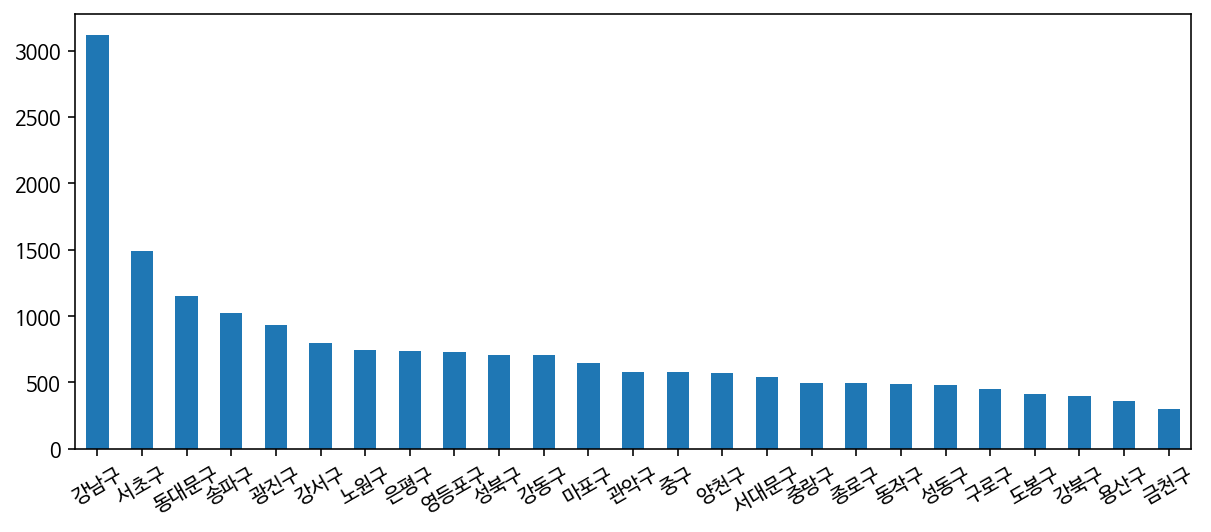

In [ ]:
seoul['시군구명'].value_counts().plot.bar(figsize=(10,4),rot=30)

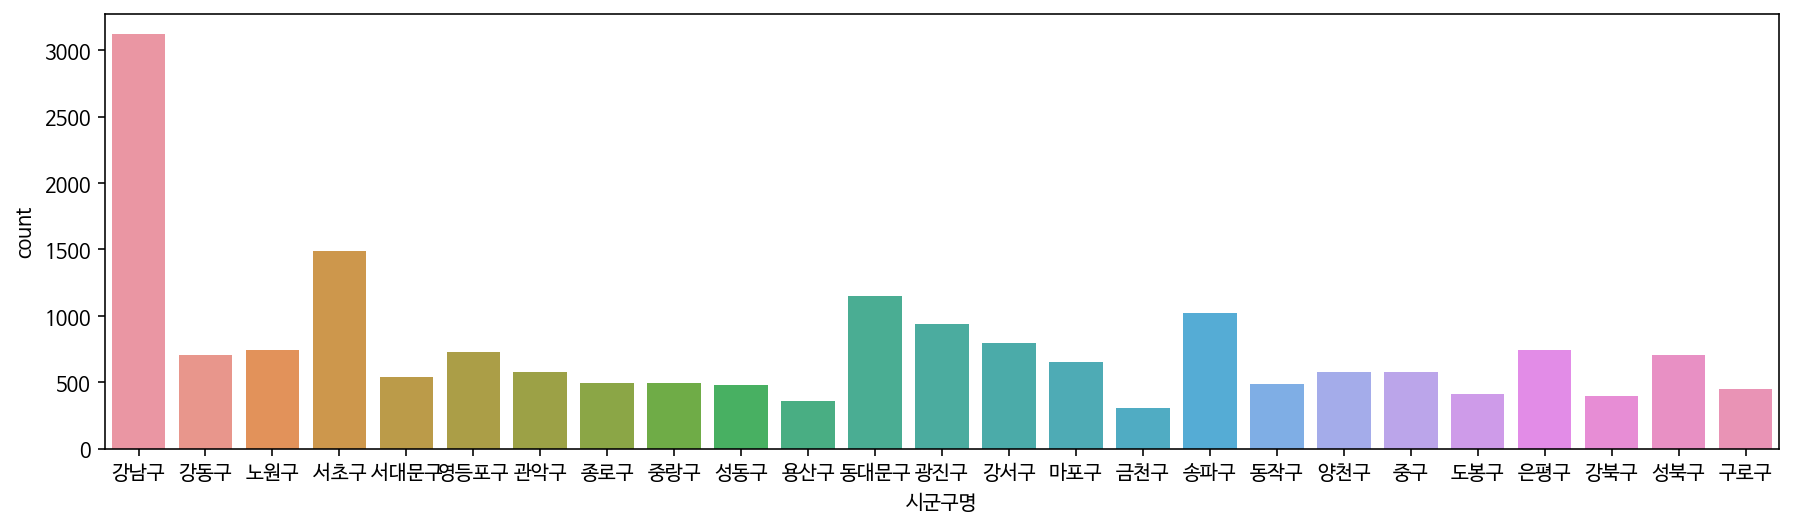

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(data=seoul,x='시군구명')

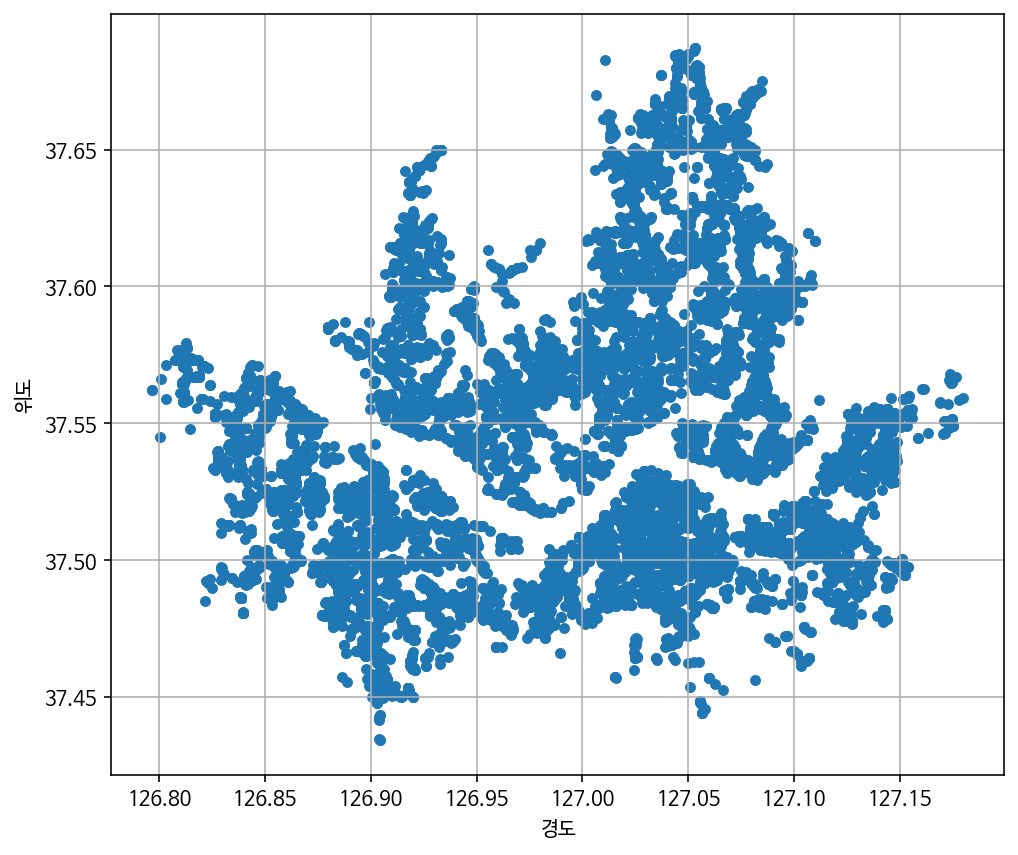

In [ ]:
seoul[["경도","위도","시군구명"]].plot.scatter(x="경도",y="위도",figsize=(8,7),grid=True)

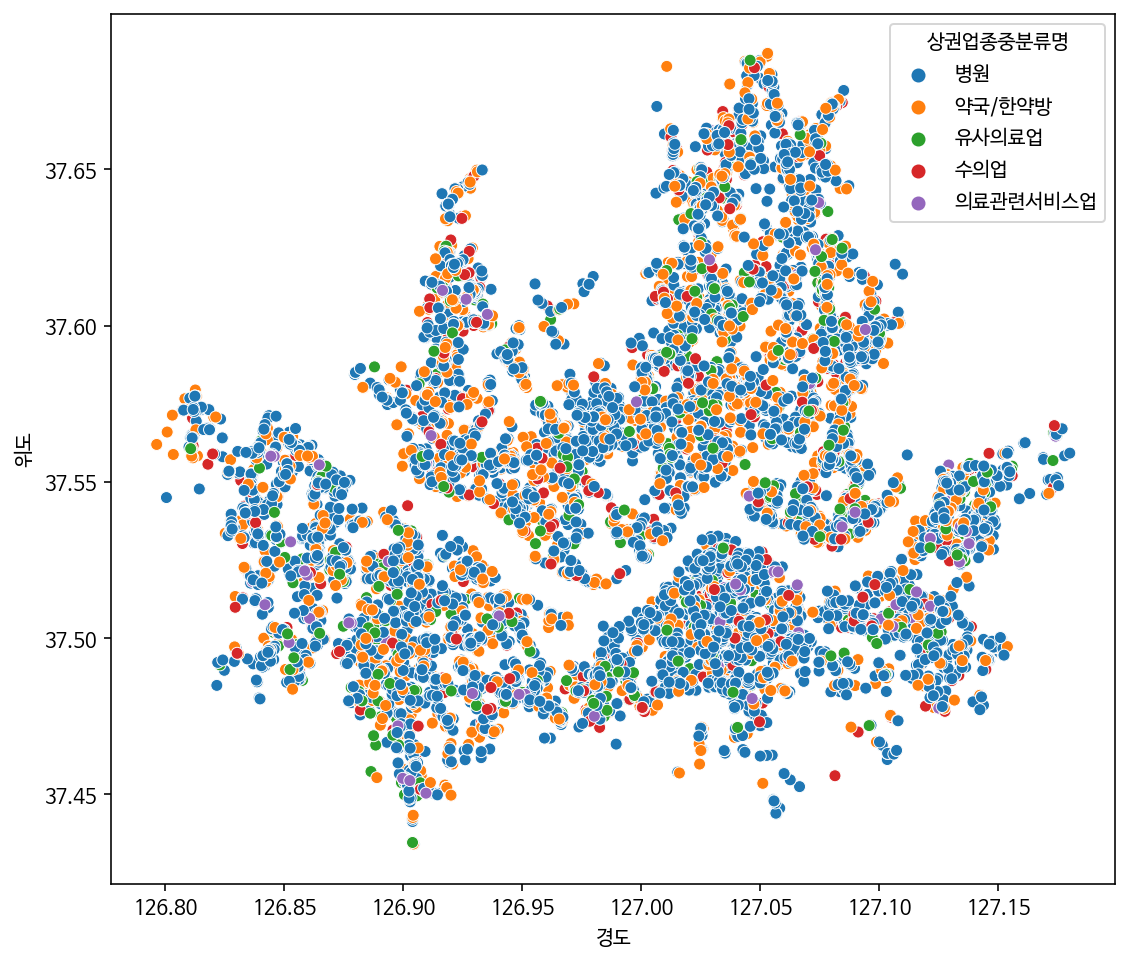

In [ ]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=seoul,x="경도",y="위도",hue="상권업종중분류명")

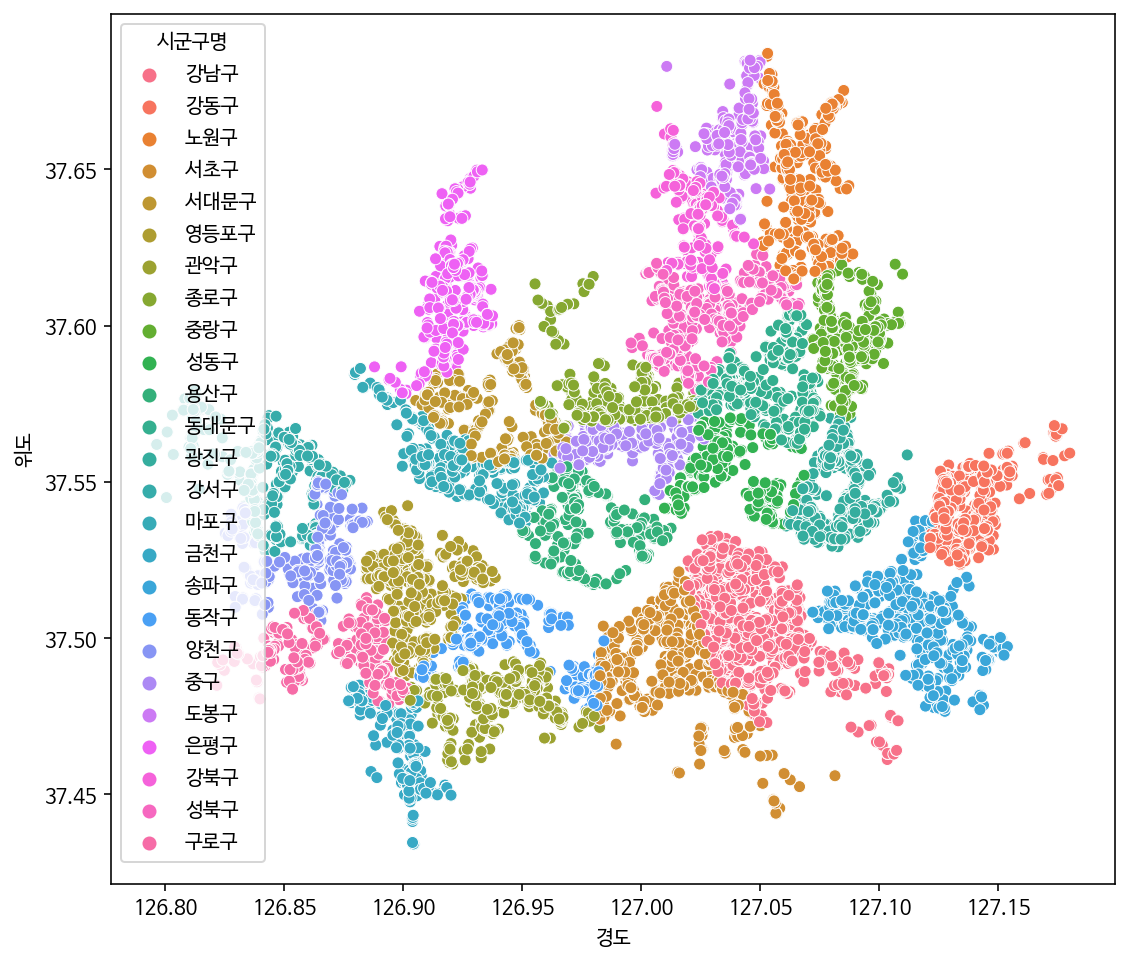

In [ ]:
plt.figure(figsize=(9, 8))
sns.scatterplot(data=seoul, x="경도", y="위도", hue="시군구명")

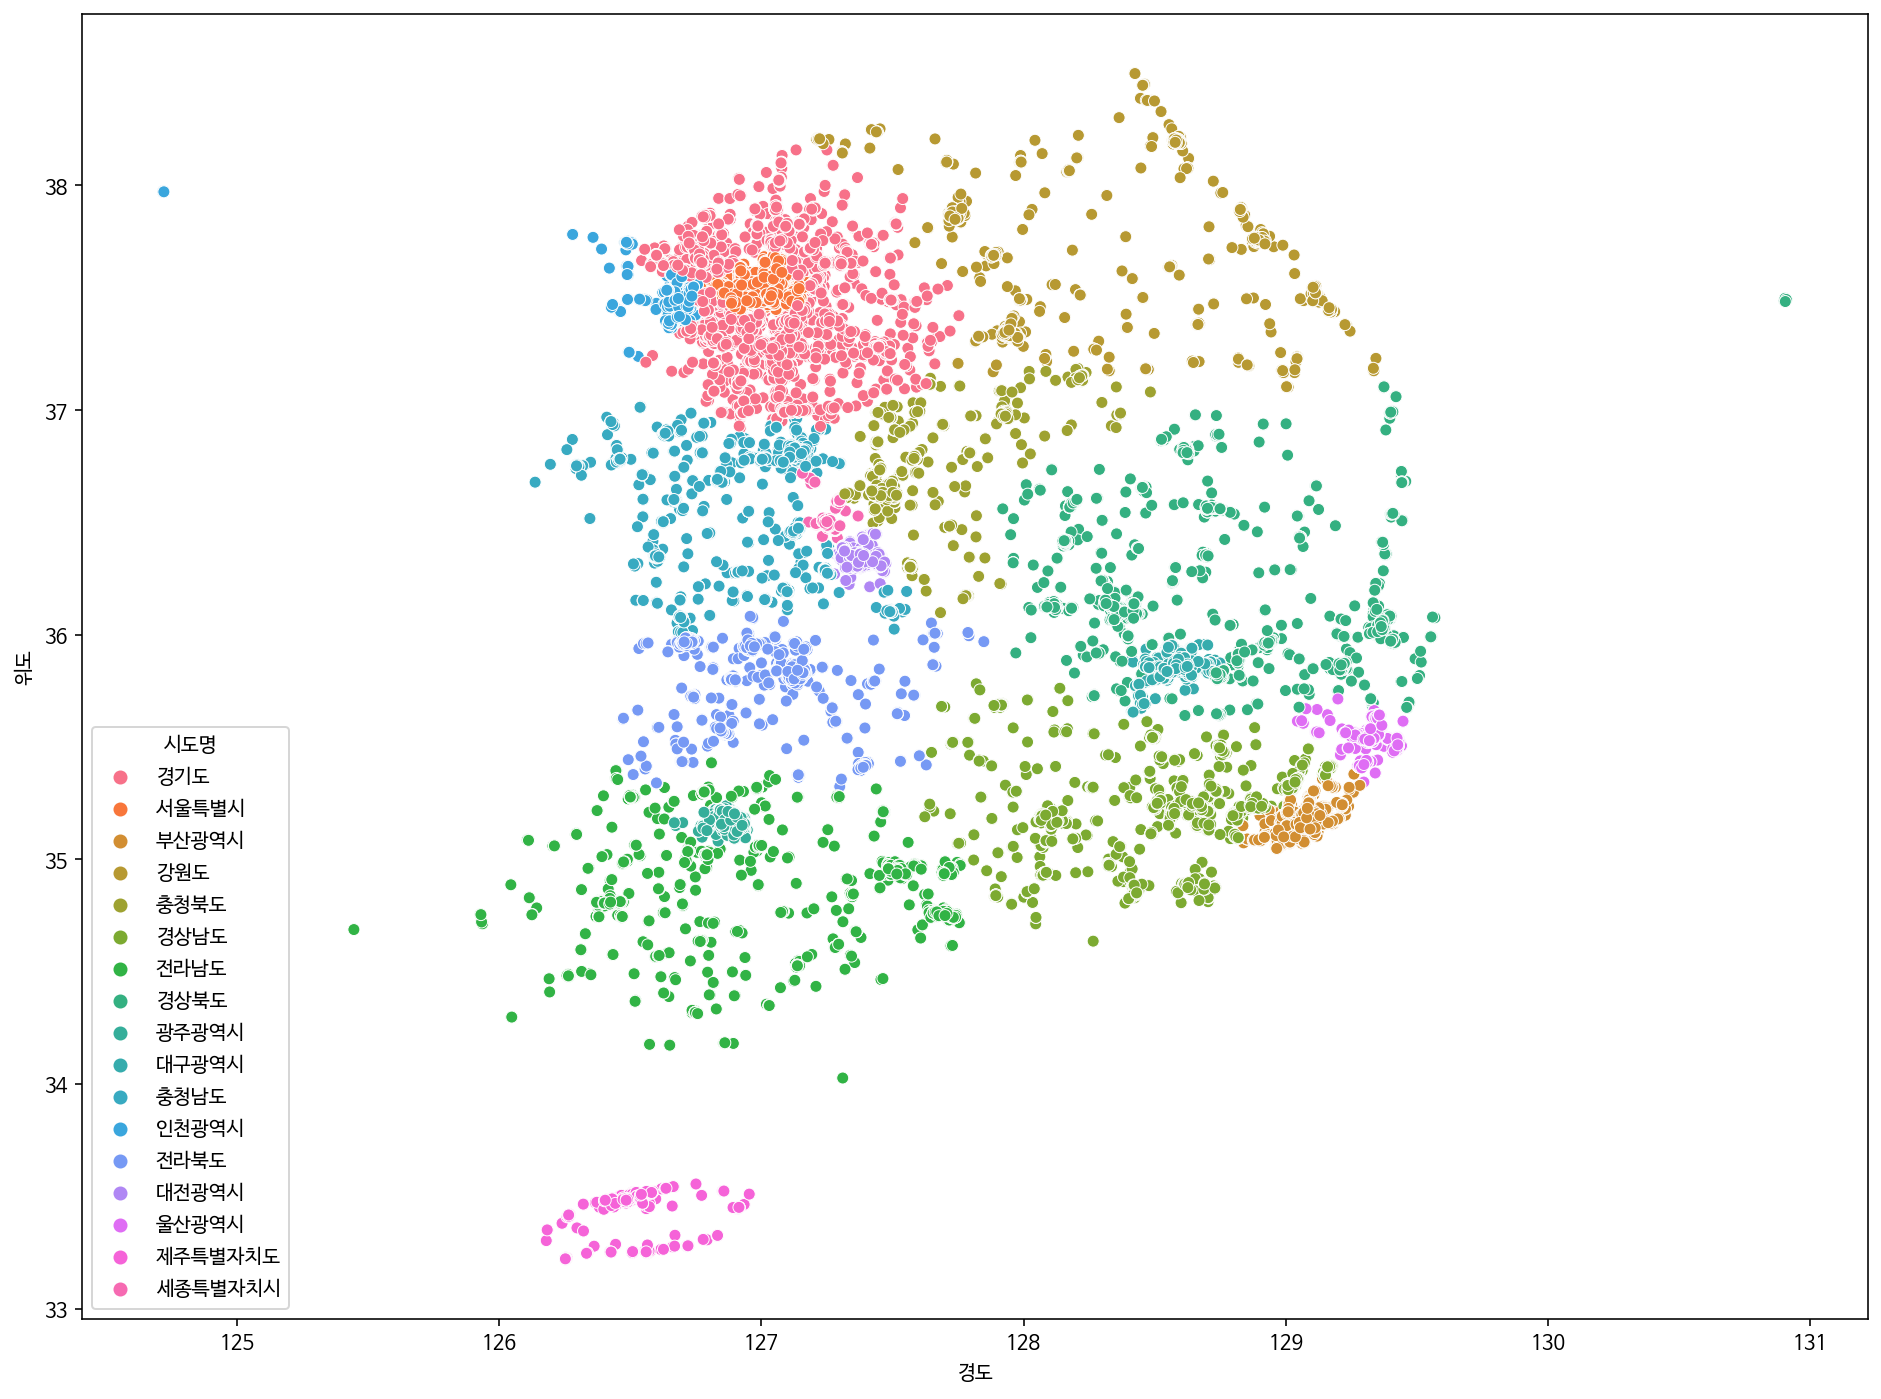

In [ ]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

# Folium

In [ ]:
import folium

In [ ]:
x=seoul_hosp["위도"].mean()
y=seoul_hosp["경도"].mean()

In [ ]:
map=folium.Map(location=[x,y],zoom_start=10.5)

In [ ]:
map